## CAPSTONE PROJECT - CLASSIFICATION

#### IMPORT PACKAGES

In [1]:
# pip install xgboost

In [1]:
# Import Package
import os
import pandas as pd
import numpy as np
import sort_dataframeby_monthorweek as sd

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#### READ DATASET

In [2]:
df = pd.read_excel('reservasi_hotel.xlsx', header=0)
df.head()

tipe_hotel pembatalan  waktu_tunggu  tahun_kedatangan bulan_kedatangan  \
0  Resort Hotel      Tidak           342              2017             July   
1  Resort Hotel      Tidak           737              2017             July   
2  Resort Hotel      Tidak             7              2017             July   
3  Resort Hotel      Tidak            13              2017             July   
4  Resort Hotel      Tidak            14              2017             July   

   minggu_kedatangan  tanggal_kedatangan  menginap_di_weekend  \
0                 27                   1                    0   
1                 27                   1                    0   
2                 27                   1                    0   
3                 27                   1                    0   
4                 27                   1                    0   

   menginap_in_week_nights  dewasa  ...  tipe_ruang  tipe_kamar_ditentukan  \
0                        0       2  ...           C                      C   
1                        0       2  ...           C                      C   
2                        1       1  ...           A                      C   
3                        1       1  ...           A                      A   
4                        2       2  ...           A                      A   

  perubahan_pemesanan tipe_deposit company  days_in_waiting_list  \
0                   3   No Deposit     NaN                     0   
1                   4   No Deposit     NaN                     0   
2                   0   No Deposit     NaN                     0   
3                   0   No Deposit     NaN                     0   
4                   0   No Deposit     NaN                     0   

   tipe_customer   adr required_car_parking_spaces status_reservasi  
0      Transient   0.0                           0        Check-Out  
1      Transient   0.0                           0        Check-Out  
2      Transient  75.0                           0        Check-Out  
3      Transient  75.0                           0        Check-Out  
4      Transient  98.0                           0        Check-Out  

[5 rows x 28 columns]

#### PROBLEM STATEMENT

Sebuah perusahaan booking online untuk hotel akan mengoptimalkan customer yang akan melakukan pembatalan secara tiba-tiba, sehingga status website pemesanan online dapat diperbaiki dan mengetahui pelanggan yang akan melakukan pembatalan.

Have-to-do : 
- Perusahaan ingin mengetahui bagaimana profiling dari customer hotel mitranya, dari negara mana, bagaimana karakteristik dalam pemesanan hotel dilihat berdasarkan resort hotel dan city hotel
- Perusahaan ingin fokus pada karakteristik yang melakukan pembatalan dan pembatalan sebelumnya, hal ini ingin mengoptimalkan dengan menerapkan kebijakan baru agar tidak terjadi pembatalan yang berlebih, karena dapat merugikan perusahaan
- Membuat machine learning dengan feature-feature dan berikan kebijakan berdasarkan model machine learning yang dibuat untuk mengoptimalkan website pemesanan online hotel

#### EDA

Profiling customer berdasarkan tipe hotel (city hotel / resort hotel)

In [3]:
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   tipe_hotel                             119390 non-null  object 
 1   pembatalan                             119390 non-null  object 
 2   waktu_tunggu                           119390 non-null  int64  
 3   tahun_kedatangan                       119390 non-null  int64  
 4   bulan_kedatangan                       119390 non-null  object 
 5   minggu_kedatangan                      119390 non-null  int64  
 6   tanggal_kedatangan                     119390 non-null  int64  
 7   menginap_di_weekend                    119390 non-null  int64  
 8   menginap_in_week_nights                119390 non-null  int64  
 9   dewasa                                 119390 non-null  int64  
 10  anak_anak                              119386 non-null  

In [4]:
#mengecek statistik deskriptif
df.describe()

waktu_tunggu  tahun_kedatangan  minggu_kedatangan  tanggal_kedatangan  \
count  119390.000000     119390.000000      119390.000000       119390.000000   
mean      104.011416       2018.156554          27.165173           15.798241   
std       106.863097          0.707476          13.605138            8.780829   
min         0.000000       2017.000000           1.000000            1.000000   
25%        18.000000       2018.000000          16.000000            8.000000   
50%        69.000000       2018.000000          28.000000           16.000000   
75%       160.000000       2019.000000          38.000000           23.000000   
max       737.000000       2019.000000          53.000000           31.000000   

       menginap_di_weekend  menginap_in_week_nights         dewasa  \
count        119390.000000            119390.000000  119390.000000   
mean              0.927599                 2.500302       1.856403   
std               0.998613                 1.908286       0.579261   
min               0.000000                 0.000000       0.000000   
25%               0.000000                 1.000000       2.000000   
50%               1.000000                 2.000000       2.000000   
75%               2.000000                 3.000000       2.000000   
max              19.000000                50.000000      55.000000   

           anak_anak         babies  tamu_berulang  pembatalan_sebelumnya  \
count  119386.000000  119390.000000  119390.000000          119390.000000   
mean        0.103890       0.007949       0.031912               0.087118   
std         0.398561       0.097436       0.175767               0.844336   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.000000       0.000000       0.000000               0.000000   
50%         0.000000       0.000000       0.000000               0.000000   
75%         0.000000       0.000000       0.000000               0.000000   
max        10.000000      10.000000       1.000000              26.000000   

       pemesanan_sebelumnya_tidak_dibatalkan  perubahan_pemesanan  \
count                          119390.000000        119390.000000   
mean                                0.137097             0.221124   
std                                 1.497437             0.652306   
min                                 0.000000             0.000000   
25%                                 0.000000             0.000000   
50%                                 0.000000             0.000000   
75%                                 0.000000             0.000000   
max                                72.000000            21.000000   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
std     131.655015             17.594721      50.535790   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   

       required_car_parking_spaces  
count                119390.000000  
mean                      0.062518  
std                       0.245291  
min                       0.000000  
25%                       0.000000  
50%                       0.000000  
75%                       0.000000  
max                       8.000000

In [5]:
df_city = df[df['tipe_hotel'] == 'City Hotel']
df_resort = df[df['tipe_hotel'] == 'Resort Hotel']

In [6]:
#pemesanan city_hotel setiap bulan yang tidak melakukan pembatalan
city_hotel=df[df['tipe_hotel']=='City Hotel']
city_hotel=city_hotel[city_hotel['pembatalan']=='Tidak']

#pemesanan resort_hotel setiap bulan yang tidak melakukan pembatalan
resort_hotel=df[df['tipe_hotel']=='Resort Hotel']
resort_hotel=resort_hotel[resort_hotel['pembatalan']=='Tidak']

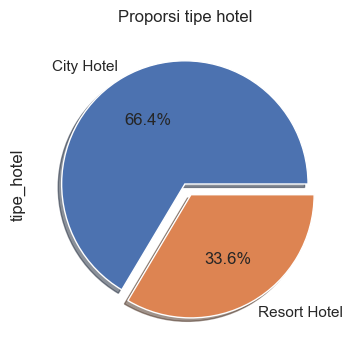

In [8]:
# Customer dari negara mana yang paling banyak booking hotel?

fig, axes = plt.subplots(figsize=(8, 4))
df['tipe_hotel'].value_counts().head().plot.pie(autopct='%1.1f%%',shadow=True, ax=axes, explode=(0,0.1))
axes.set_title('Proporsi tipe hotel')
plt.show()

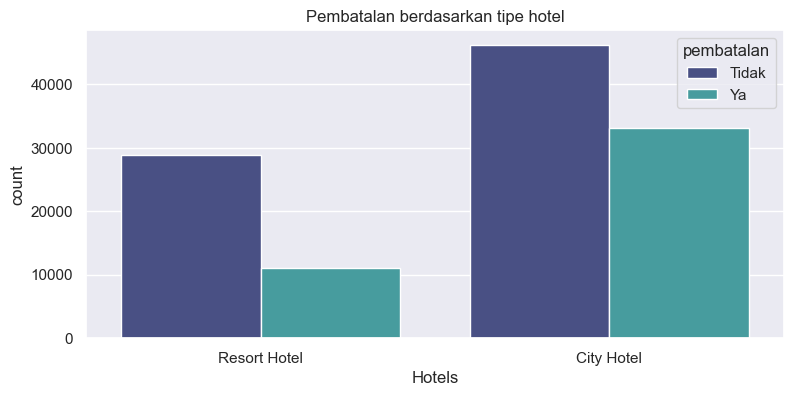

In [9]:
plt.rcParams['figure.figsize'] = (9, 4)
sns.countplot(x='tipe_hotel',data=df,hue='pembatalan',palette='mako',ec='white',lw=1).set(xlabel='Hotels')
plt.title('Pembatalan berdasarkan tipe hotel')
plt.show()

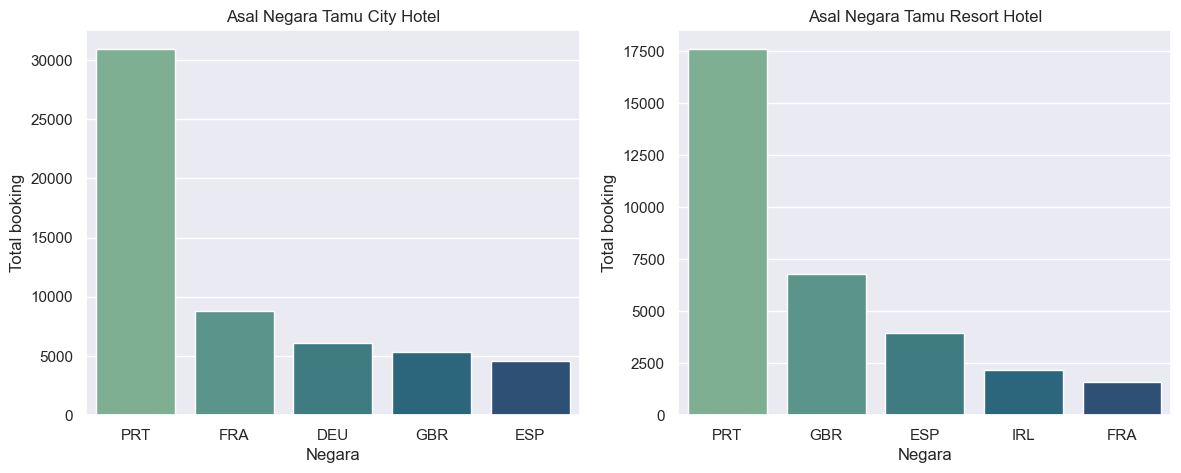

In [10]:
# Customer dari negara mana yang paling banyak memesan hotel?

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.barplot(x=list(df_city.negara.value_counts().head().keys()),y=list(df_city.negara.value_counts().head()),ec='white',lw=1,palette='crest', ax=axes[0])
sns.barplot(x=list(df_resort.negara.value_counts().head().keys()),y=list(df_resort.negara.value_counts().head()),ec='white',lw=1, ax=axes[1], palette='crest')
for i in range(2):
    axes[i].set_xlabel('Negara')
    axes[i].set_ylabel('Total booking')
axes[0].set_title('Asal Negara Tamu City Hotel')
axes[1].set_title('Asal Negara Tamu Resort Hotel')
plt.show()

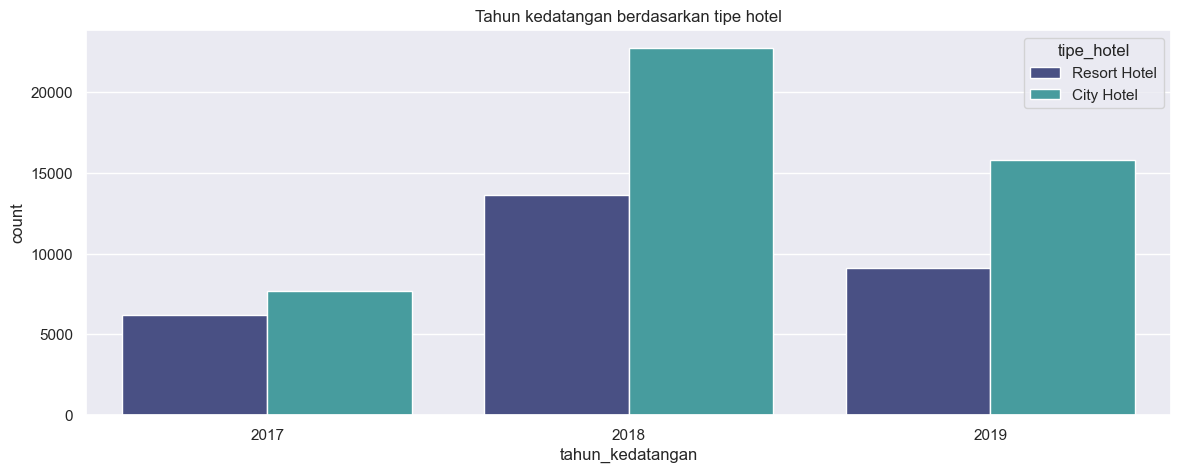

In [11]:
fig, axes = plt.subplots(figsize=(14,5))
sns.countplot(data=df[df['pembatalan']=='Tidak'], x="tahun_kedatangan", hue="tipe_hotel", palette='mako', ec='white',lw=1)
plt.title('Tahun kedatangan berdasarkan tipe hotel')
plt.show()

Text(0, 0.5, 'Jumlah Customer')

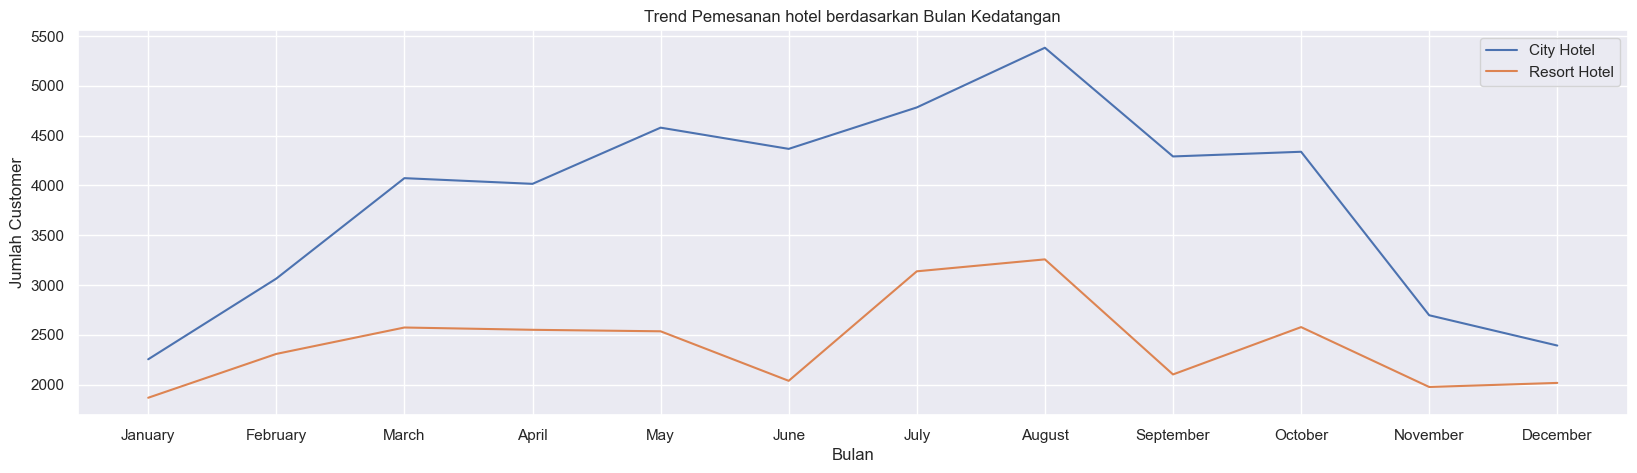

In [12]:
#menghitung jumlah tipe hotel berdasarkan bulan kedatangan
pemesanan_city_hotel=city_hotel.groupby('bulan_kedatangan',as_index=False)['tipe_hotel'].count()
pemesanan_city_hotel.rename(columns={'tipe_hotel':'city_hotel'},inplace=True)
pemesanan_resort_hotel=resort_hotel.groupby('bulan_kedatangan',as_index=False)['tipe_hotel'].count()
pemesanan_resort_hotel.rename(columns={'tipe_hotel':'resort_hotel'},inplace=True)

#total pemesanan
total_pemesanan=pemesanan_city_hotel.merge(pemesanan_resort_hotel,on='bulan_kedatangan')
total_pemesanan.rename(columns={'bulan_kedatangan':'bulan'},inplace=True)

#urutkan bulan
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
total_pemesanan=total_pemesanan.sort_values('bulan', key = lambda x : x.apply (lambda x : month_dict[x]))

#plotting
fig,axes=plt.subplots(figsize=(20,5))
plt.plot('bulan','city_hotel',data=total_pemesanan,label='City Hotel')
plt.plot('bulan','resort_hotel',data=total_pemesanan,label='Resort Hotel')
plt.title('Trend Pemesanan hotel berdasarkan Bulan Kedatangan')
plt.legend()
plt.xlabel('Bulan')
plt.ylabel('Jumlah Customer')

Text(0, 0.5, 'Jumlah Customer')

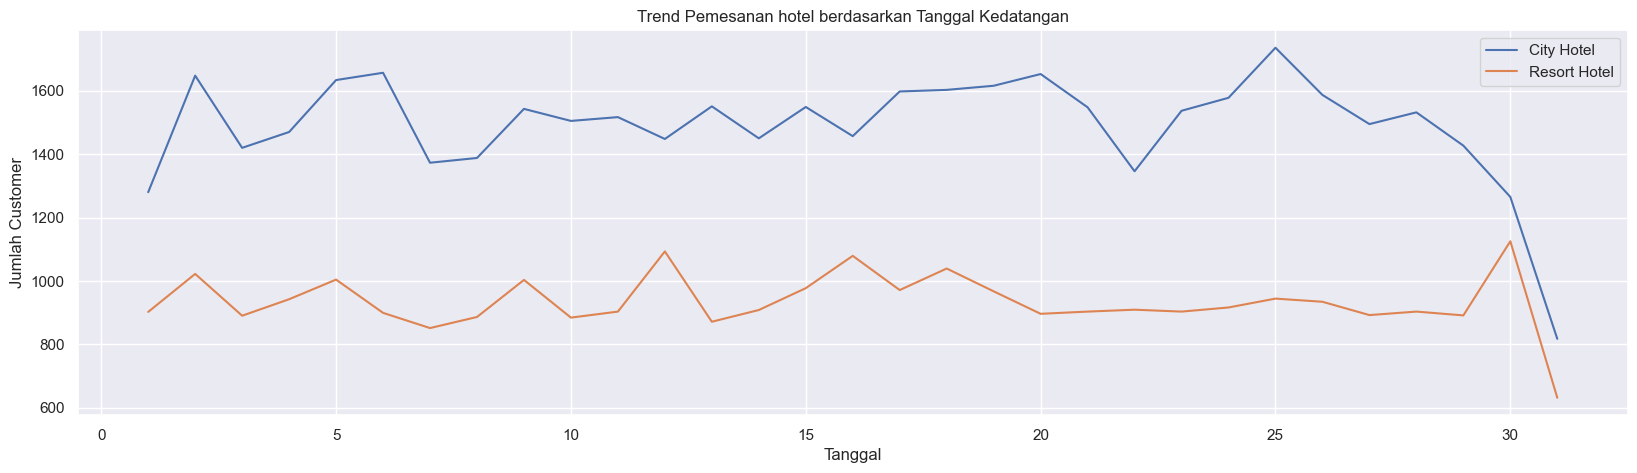

In [13]:
#menghitung jumlah tipe hotel berdasarkan tanggal kedatangan
pemesanan_city_hotel=city_hotel.groupby('tanggal_kedatangan',as_index=False)['tipe_hotel'].count()
pemesanan_city_hotel.rename(columns={'tipe_hotel':'city_hotel'},inplace=True)
pemesanan_resort_hotel=resort_hotel.groupby('tanggal_kedatangan',as_index=False)['tipe_hotel'].count()
pemesanan_resort_hotel.rename(columns={'tipe_hotel':'resort_hotel'},inplace=True)

#total pemesanan
total_pemesanan=pemesanan_city_hotel.merge(pemesanan_resort_hotel,on='tanggal_kedatangan')
total_pemesanan.rename(columns={'tanggal_kedatangan':'tanggal'},inplace=True)

#plotting
fig,axes=plt.subplots(figsize=(20,5))
plt.plot('tanggal','city_hotel',data=total_pemesanan,label='City Hotel')
plt.plot('tanggal','resort_hotel',data=total_pemesanan,label='Resort Hotel')
plt.legend()
plt.title('Trend Pemesanan hotel berdasarkan Tanggal Kedatangan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Customer')

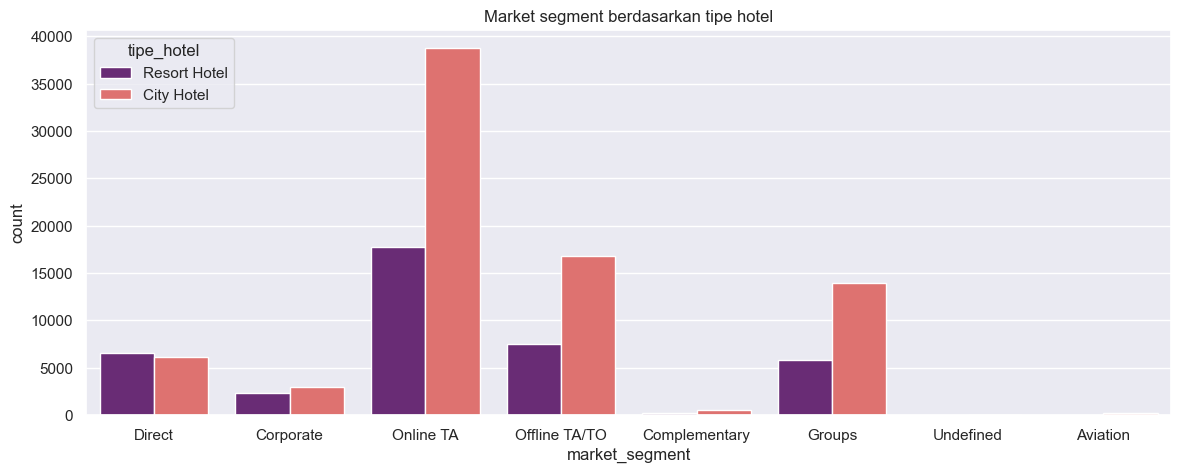

In [14]:
fig, axes = plt.subplots(figsize=(14,5))
sns.countplot(data=df, x="market_segment", hue="tipe_hotel", palette='magma', ec='white',lw=1)
plt.title('Market segment berdasarkan tipe hotel')
plt.show()

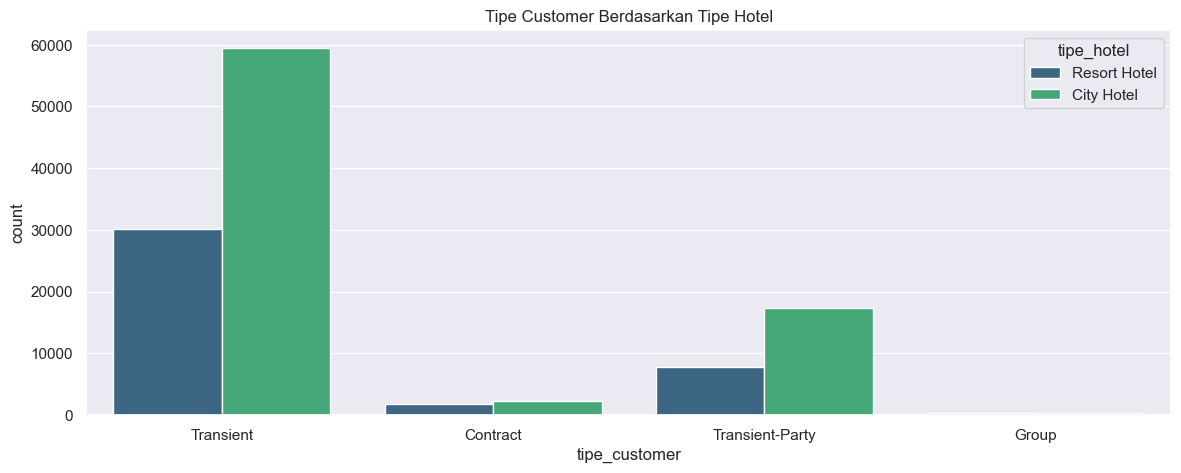

In [15]:
fig, axes = plt.subplots(figsize=(14,5))
sns.countplot(data=df, x="tipe_customer", hue="tipe_hotel" , palette='viridis', ec='white',lw=1)
plt.title('Tipe Customer Berdasarkan Tipe Hotel')
plt.show()

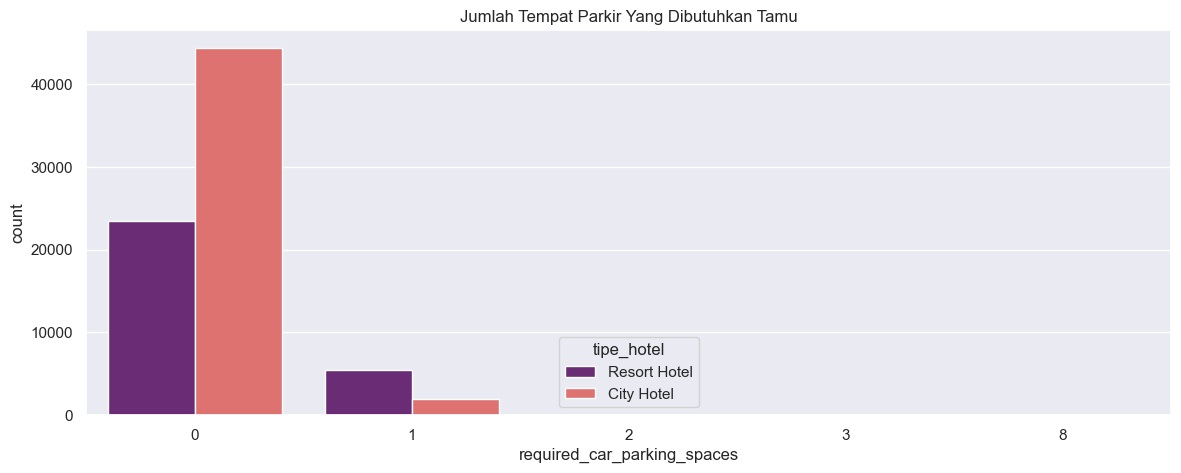

In [16]:
fig, axes = plt.subplots(figsize=(14,5))
sns.countplot(data=df[df['pembatalan']=='Tidak'], x="required_car_parking_spaces", hue="tipe_hotel", palette='magma', ec='white',lw=1)
plt.title('Jumlah Tempat Parkir Yang Dibutuhkan Tamu')
plt.show()

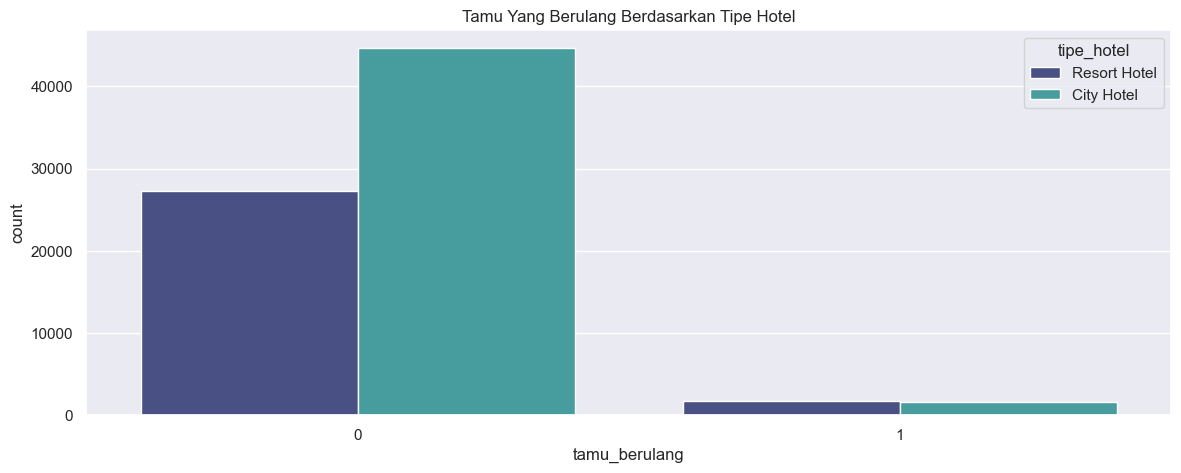

In [17]:
fig, axes = plt.subplots(figsize=(14,5))
sns.countplot(data=df[df['pembatalan']=='Tidak'], x="tamu_berulang", hue="tipe_hotel", palette='mako', ec='white',lw=1)
plt.title('Tamu Yang Berulang Berdasarkan Tipe Hotel')
plt.show()

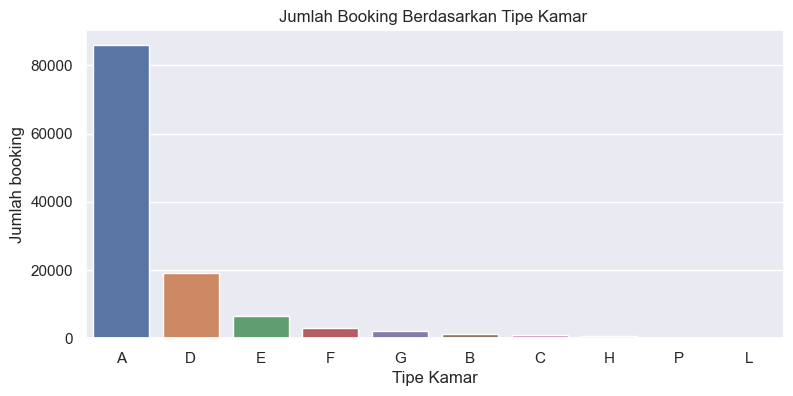

In [18]:
tipe_kamar = pd.DataFrame(df.tipe_ruang.value_counts())
sns.barplot(y=list(tipe_kamar['tipe_ruang']),
            x=list(tipe_kamar.index),ec='white',lw=1).set(xlabel='Tipe Kamar',ylabel='Jumlah booking')
plt.title('Jumlah Booking Berdasarkan Tipe Kamar ')
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\3850175173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['total_menginap'] = df_city['menginap_di_weekend'] + df_city['menginap_in_week_nights']
C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\3850175173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resort['total_menginap'] = df_resort['menginap_di_weekend'] + df_resort['menginap_in_week_nights']


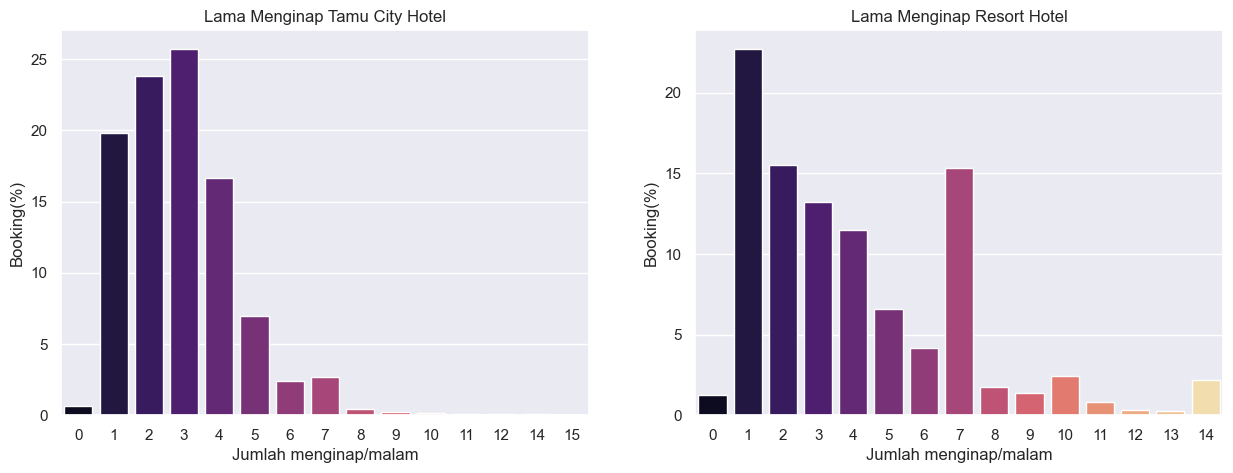

In [19]:
# lama menginap customer
df_city['total_menginap'] = df_city['menginap_di_weekend'] + df_city['menginap_in_week_nights']
df_resort['total_menginap'] = df_resort['menginap_di_weekend'] + df_resort['menginap_in_week_nights']

lama_menginap_city=(df_city[df_city['pembatalan']=='Tidak'].total_menginap).value_counts(normalize=True)*100
lama_menginap_resort=(df_resort[df_resort['pembatalan']=='Tidak'].total_menginap).value_counts(normalize=True)*100

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(y=list(lama_menginap_city.head(15)),x=list(lama_menginap_city.head(15).keys()),ec='white',lw=1, palette='magma',ax=axes[0])
sns.barplot(y=list(lama_menginap_resort.head(15)),x=list(lama_menginap_resort.head(15).keys()),ec='white',lw=1, palette='magma',ax=axes[1])
plt.xlabel('Jumlah menginap/malam')
plt.ylabel('Booking(%)')
plt.title('City Hotel')

for i in range(2):
    axes[i].set_xlabel('Jumlah menginap/malam')
    axes[i].set_ylabel('Booking(%)')
axes[0].set_title('Lama Menginap Tamu City Hotel')
axes[1].set_title('Lama Menginap Resort Hotel')
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\2815472134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['total_customer'] = df_city['anak_anak'] + df_city['babies'] + df_city['dewasa']
C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\2815472134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resort['total_customer'] = df_resort['anak_anak'] + df_resort['babies'] + df_resort['dewasa']


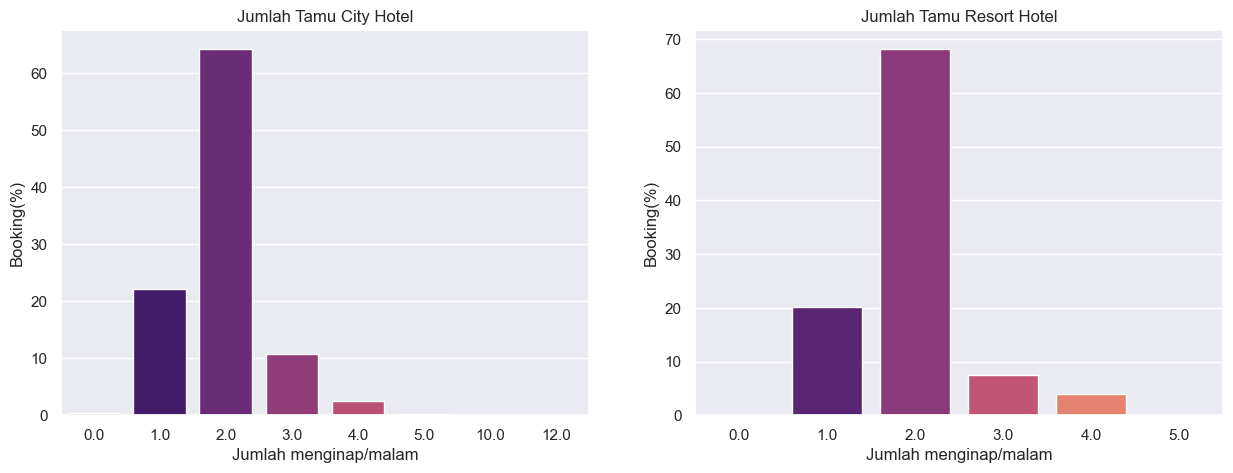

In [20]:
# cek apakah ada anak yang menginap tanpa orang dewasa

df_city['total_customer'] = df_city['anak_anak'] + df_city['babies'] + df_city['dewasa']
df_resort['total_customer'] = df_resort['anak_anak'] + df_resort['babies'] + df_resort['dewasa']
# df['total_customer'].astype('int32')
customer_city=(df_city[df_city['pembatalan']=='Tidak'].total_customer).value_counts(normalize=True)*100
customer_resort=(df_resort[df_resort['pembatalan']=='Tidak'].total_customer).value_counts(normalize=True)*100

fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(y=list(customer_city.head(15)),x=list(customer_city.head(15).keys()),ec='white',lw=1, palette='magma',ax=axes[0])
sns.barplot(y=list(customer_resort.head(15)),x=list(customer_resort.head(15).keys()),ec='white',lw=1, palette='magma',ax=axes[1])
plt.xlabel('Jumlah menginap/malam')
plt.ylabel('Booking(%)')
plt.title('City Hotel')

for i in range(2):
    axes[i].set_xlabel('Jumlah menginap/malam')
    axes[i].set_ylabel('Booking(%)')
axes[0].set_title('Jumlah Tamu City Hotel')
axes[1].set_title('Jumlah Tamu Resort Hotel')
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\1502203580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_menginap['price_per_month'] = data_menginap['adr'] * (data_menginap['menginap_di_weekend'] + data_menginap['menginap_in_week_nights'])


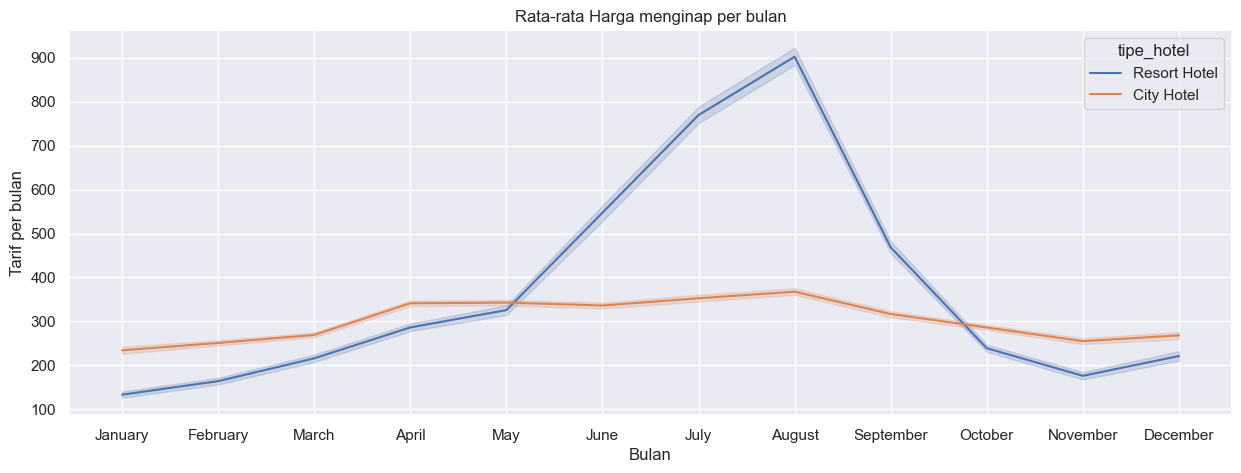

In [21]:
data_menginap = df[['adr', 'dewasa', 'anak_anak', 'menginap_di_weekend', 
                    'menginap_in_week_nights', 'tipe_hotel', 'pembatalan', 
                    'bulan_kedatangan', 'tanggal_kedatangan']]
data_menginap['price_per_month'] = data_menginap['adr'] * (data_menginap['menginap_di_weekend'] + data_menginap['menginap_in_week_nights'])
data_menginap = data_menginap[data_menginap['pembatalan'] == 'Tidak']

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

data_menginap = sort_month(data_menginap,'bulan_kedatangan')

fig, axes = plt.subplots(figsize=(15,5))
sns.lineplot(data=data_menginap, x='bulan_kedatangan', y='price_per_month', hue='tipe_hotel')
plt.xlabel('Bulan')
plt.ylabel('Tarif per bulan')
plt.title('Rata-rata Harga menginap per bulan')
plt.show()

Text(0.5, 1.0, 'Rata-rata Harga Menginap Per Hari')

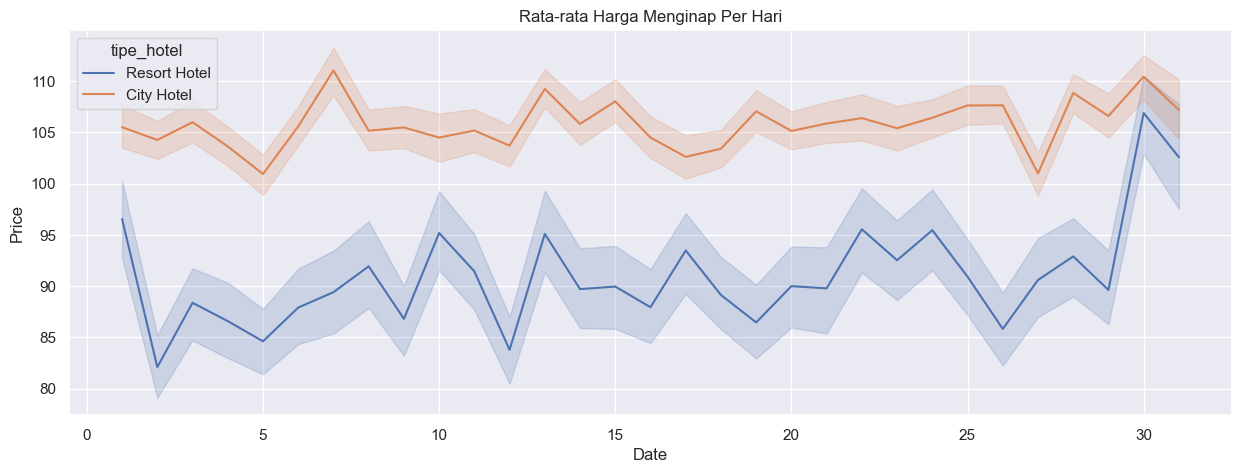

In [22]:
fig, axes = plt.subplots(figsize=(15,5))
sns.lineplot(data=data_menginap, x='tanggal_kedatangan', y='adr', hue='tipe_hotel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Rata-rata Harga Menginap Per Hari')

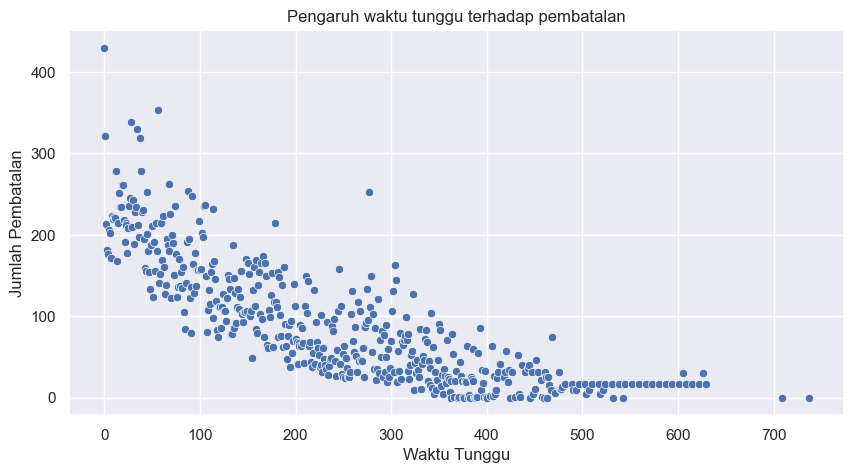

In [24]:
fig, axes = plt.subplots(figsize=(10,5))

df_waktu_tunggu = pd.crosstab(df['waktu_tunggu'], (df['pembatalan']))

stacked = df_waktu_tunggu.stack().reset_index().rename(columns={0:'value'})
sns.scatterplot(data=stacked[stacked['pembatalan']=='Ya'], x='waktu_tunggu', y='value')
plt.title('Pengaruh waktu tunggu terhadap pembatalan')
plt.ylabel('Jumlah Pembatalan')
plt.xlabel('Waktu Tunggu')
plt.show()

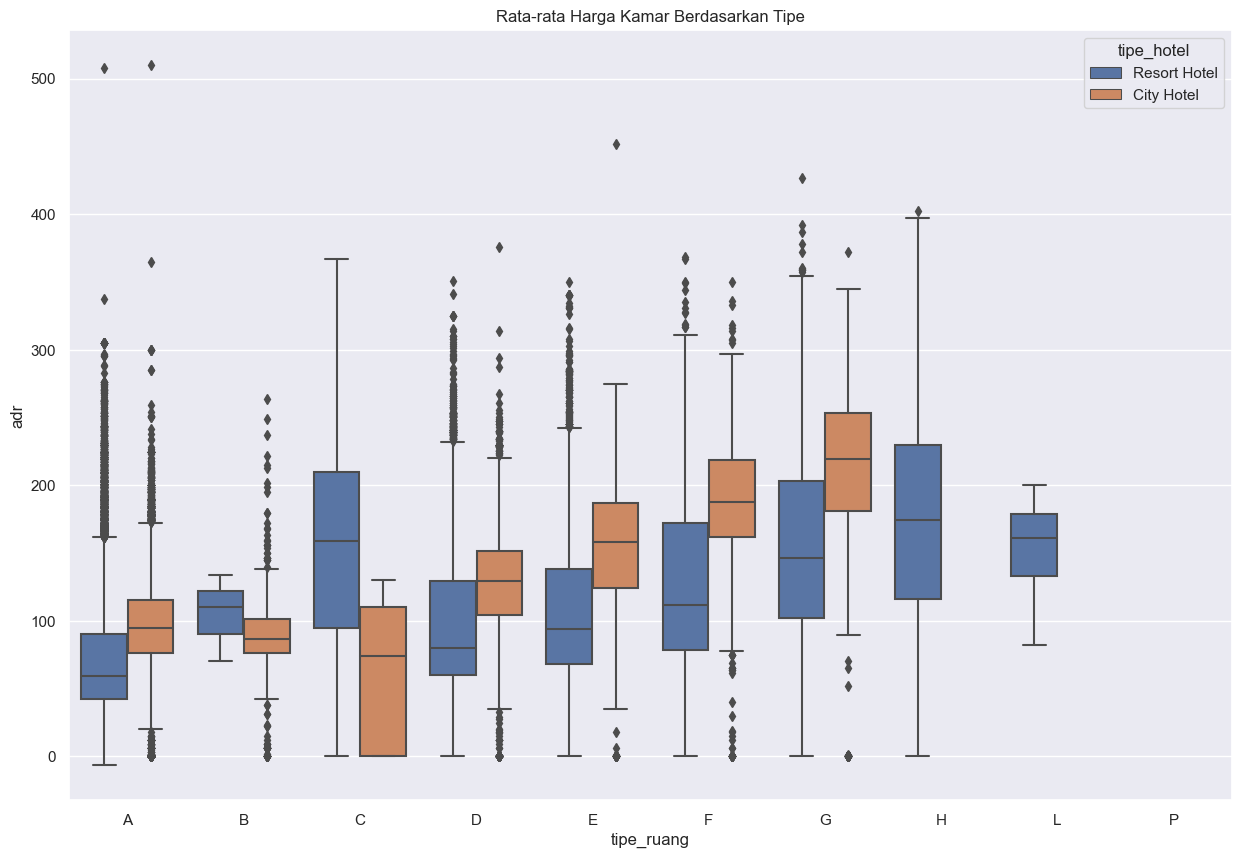

In [25]:
#rata rata tarif harian yang tidak melakukan pembatalan berdasarkan jenis kamar dan tipe hotel

fig, axes = plt.subplots(figsize=(15,10))
sns.boxplot(x='tipe_ruang',y='adr',data=df[df['pembatalan']=='Tidak'],hue='tipe_hotel',order=['A','B','C','D','E','F','G','H','L','P'])
axes.title.set_text('Rata-rata Harga Kamar Berdasarkan Tipe')
plt.show()

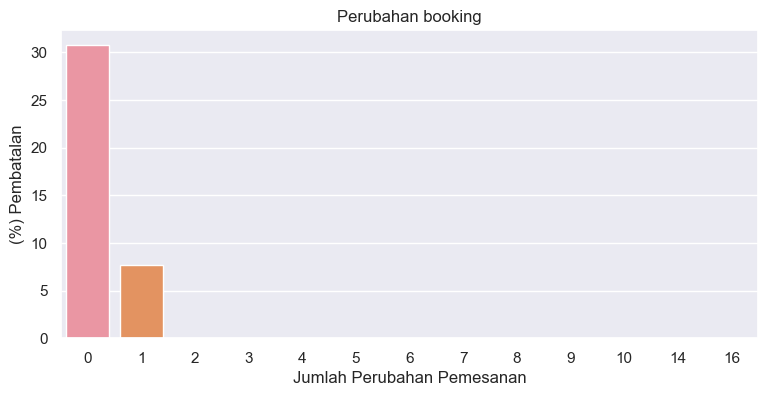

In [28]:
#apakah perubahan pemesanan mempngaruhi pembatalan?

df_perubahan_pemesanan = pd.crosstab(df['perubahan_pemesanan'], (df['pembatalan']))
df_perubahan_pemesanan

stacked = df_perubahan_pemesanan.stack().reset_index().rename(columns={0:'value'})
stacked = stacked[(stacked['pembatalan']=='Ya') & (stacked['value']!=0)]
sns.barplot(x=stacked.perubahan_pemesanan, y=stacked['value'].value_counts(normalize=True)*100)
plt.ylabel('(%) Pembatalan')
plt.xlabel('Jumlah Perubahan Pemesanan')
plt.title('Perubahan booking')
plt.show()

#### DATA PRE-PROCESSING

1. HANDLE MISSING VALUE

In [29]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(df).sum()
rasio = jumlah_missing.div(len(df))
rasio

tipe_hotel                               0.000000
pembatalan                               0.000000
waktu_tunggu                             0.000000
tahun_kedatangan                         0.000000
bulan_kedatangan                         0.000000
minggu_kedatangan                        0.000000
tanggal_kedatangan                       0.000000
menginap_di_weekend                      0.000000
menginap_in_week_nights                  0.000000
dewasa                                   0.000000
anak_anak                                0.000034
babies                                   0.000000
meal                                     0.000000
negara                                   0.004087
market_segment                           0.000000
tamu_berulang                            0.000000
pembatalan_sebelumnya                    0.000000
pemesanan_sebelumnya_tidak_dibatalkan    0.000000
tipe_ruang                               0.000000
tipe_kamar_ditentukan                    0.000000


In [30]:
#menghapus missing value lebih dari 60%
df = df.drop(['company'], axis=1)

In [31]:
# Mengubah NaNs kategorikal dengan nilai Modus
df['negara'].fillna(df['negara'].mode()[0], inplace=True)

In [32]:
# Mengubah NaNs numeric dengan nilai Modus
df['anak_anak'].fillna(df['anak_anak'].mean(), inplace=True)

In [33]:
df.isnull().sum()

tipe_hotel                               0
pembatalan                               0
waktu_tunggu                             0
tahun_kedatangan                         0
bulan_kedatangan                         0
minggu_kedatangan                        0
tanggal_kedatangan                       0
menginap_di_weekend                      0
menginap_in_week_nights                  0
dewasa                                   0
anak_anak                                0
babies                                   0
meal                                     0
negara                                   0
market_segment                           0
tamu_berulang                            0
pembatalan_sebelumnya                    0
pemesanan_sebelumnya_tidak_dibatalkan    0
tipe_ruang                               0
tipe_kamar_ditentukan                    0
perubahan_pemesanan                      0
tipe_deposit                             0
days_in_waiting_list                     0
tipe_custom

2. HANDLING DUPLICATE

In [34]:
# Mengidentifikasi apakah terdapat duplicate value pada tabel dengan acuan kolom ORDERNUMBER DAN ORDERLINENUMBER
df[df.duplicated(keep=False)]

tipe_hotel pembatalan  waktu_tunggu  tahun_kedatangan  \
4       Resort Hotel      Tidak            14              2017   
5       Resort Hotel      Tidak            14              2017   
21      Resort Hotel      Tidak            72              2017   
22      Resort Hotel      Tidak            72              2017   
39      Resort Hotel      Tidak            70              2017   
...              ...        ...           ...               ...   
119352    City Hotel      Tidak            63              2019   
119353    City Hotel      Tidak            63              2019   
119354    City Hotel      Tidak            63              2019   
119372    City Hotel      Tidak           175              2019   
119373    City Hotel      Tidak           175              2019   

       bulan_kedatangan  minggu_kedatangan  tanggal_kedatangan  \
4                  July                 27                   1   
5                  July                 27                   1   
21                 July                 27                   1   
22                 July                 27                   1   
39                 July                 27                   2   
...                 ...                ...                 ...   
119352           August                 35                  31   
119353           August                 35                  31   
119354           August                 35                  31   
119372           August                 35                  31   
119373           August                 35                  31   

        menginap_di_weekend  menginap_in_week_nights  dewasa  ...  \
4                         0                        2       2  ...   
5                         0                        2       2  ...   
21                        2                        4       2  ...   
22                        2                        4       2  ...   
39                        2                        3       2  ...   
...                     ...                      ...     ...  ...   
119352                    0                        3       3  ...   
119353                    0                        3       3  ...   
119354                    0                        3       3  ...   
119372                    1                        3       1  ...   
119373                    1                        3       1  ...   

        pemesanan_sebelumnya_tidak_dibatalkan  tipe_ruang  \
4                                           0           A   
5                                           0           A   
21                                          0           A   
22                                          0           A   
39                                          0           E   
...                                       ...         ...   
119352                                      0           D   
119353                                      0           D   
119354                                      0           D   
119372                                      0           A   
119373                                      0           A   

       tipe_kamar_ditentukan perubahan_pemesanan tipe_deposit  \
4                          A                   0   No Deposit   
5                          A                   0   No Deposit   
21                         A                   1   No Deposit   
22                         A                   1   No Deposit   
39                         E                   0   No Deposit   
...                      ...                 ...          ...   
119352                     D                   0   No Deposit   
119353                     D                   0   No Deposit   
119354                     D                   0   No Deposit   
119372                     A                   0   No Deposit   
119373                     A                   0   No Deposit   

        days_in_waiting_list    tipe_customer     adr  \
4           

In [35]:
# menghilangkan duplicate value pada tabel
df_clean = df.drop_duplicates()

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86443 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tipe_hotel                             86443 non-null  object 
 1   pembatalan                             86443 non-null  object 
 2   waktu_tunggu                           86443 non-null  int64  
 3   tahun_kedatangan                       86443 non-null  int64  
 4   bulan_kedatangan                       86443 non-null  object 
 5   minggu_kedatangan                      86443 non-null  int64  
 6   tanggal_kedatangan                     86443 non-null  int64  
 7   menginap_di_weekend                    86443 non-null  int64  
 8   menginap_in_week_nights                86443 non-null  int64  
 9   dewasa                                 86443 non-null  int64  
 10  anak_anak                              86443 non-null  float64
 11  b

3. UBAH TIPE DATA

In [37]:
# Mengubah data type
df_clean['anak_anak'] = df['anak_anak'].astype('int64')

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4120\3310099724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anak_anak'] = df['anak_anak'].astype('int64')


In [38]:
df_clean['anak_anak'].dtype

dtype('int64')

4. LABEL ENCODER

In [39]:
df_1 = df_clean.copy()

In [40]:
#mengubah bulan menjadi angka
df_clean = df_clean.replace({'bulan_kedatangan': {'January':1,'February':2,'March':3, 
                                       'April':4, 'May':5, 'June':6, 'July':7, 
                                       'August':8, 'September':9, 'October':10, 
                                       'November':11, 'December':12}})

In [41]:
kategori = ['pembatalan','tipe_hotel','meal','negara','market_segment','tipe_ruang',
            'tipe_kamar_ditentukan','tipe_deposit','tipe_customer','status_reservasi',
            'bulan_kedatangan', 'tahun_kedatangan']
df_cat = df_clean[kategori]
df_cat.head()

pembatalan    tipe_hotel meal negara market_segment tipe_ruang  \
0      Tidak  Resort Hotel   BB    PRT         Direct          C   
1      Tidak  Resort Hotel   BB    PRT         Direct          C   
2      Tidak  Resort Hotel   BB    GBR         Direct          A   
3      Tidak  Resort Hotel   BB    GBR      Corporate          A   
4      Tidak  Resort Hotel   BB    GBR      Online TA          A   

  tipe_kamar_ditentukan tipe_deposit tipe_customer status_reservasi  \
0                     C   No Deposit     Transient        Check-Out   
1                     C   No Deposit     Transient        Check-Out   
2                     C   No Deposit     Transient        Check-Out   
3                     A   No Deposit     Transient        Check-Out   
4                     A   No Deposit     Transient        Check-Out   

   bulan_kedatangan  tahun_kedatangan  
0                 7              2017  
1                 7              2017  
2                 7              2017  
3                 7              2017  
4                 7              2017

In [42]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df_clean.columns.values:
            df_clean[feature] = encoded_data.fit_transform(df_clean[feature])

df_clean.head()

tipe_hotel  pembatalan  waktu_tunggu  tahun_kedatangan  bulan_kedatangan  \
0           1           0           342                 0                 6   
1           1           0           737                 0                 6   
2           1           0             7                 0                 6   
3           1           0            13                 0                 6   
4           1           0            14                 0                 6   

   minggu_kedatangan  tanggal_kedatangan  menginap_di_weekend  \
0                 27                   1                    0   
1                 27                   1                    0   
2                 27                   1                    0   
3                 27                   1                    0   
4                 27                   1                    0   

   menginap_in_week_nights  dewasa  ...  \
0                        0       2  ...   
1                        0       2  ...   
2                        1       1  ...   
3                        1       1  ...   
4                        2       2  ...   

   pemesanan_sebelumnya_tidak_dibatalkan  tipe_ruang  tipe_kamar_ditentukan  \
0                                      0           2                      2   
1                                      0           2                      2   
2                                      0           0                      2   
3                                      0           0                      0   
4                                      0           0                      0   

   perubahan_pemesanan  tipe_deposit  days_in_waiting_list  tipe_customer  \
0                    3             0                     0              2   
1                    4             0                     0              2   
2                    0             0                     0              2   
3                    0             0                     0              2   
4                    0             0                     0              2   

    adr  required_car_parking_spaces  status_reservasi  
0   0.0                            0                 1  
1   0.0                            0                 1  
2  75.0                            0                 1  
3  75.0                            0                 1  
4  98.0                            0                 1  

[5 rows x 27 columns]

#### FEATURE ENGINEERING

1. PENAMBAHAN FEATURE

In [43]:
df_clean['total_menginap'] = df_clean['menginap_di_weekend'] + df_clean['menginap_in_week_nights']
df_clean['total_customer'] = df_clean['dewasa'] + df_clean['anak_anak'] + df_clean['babies']

In [44]:
df_clean.head()

tipe_hotel  pembatalan  waktu_tunggu  tahun_kedatangan  bulan_kedatangan  \
0           1           0           342                 0                 6   
1           1           0           737                 0                 6   
2           1           0             7                 0                 6   
3           1           0            13                 0                 6   
4           1           0            14                 0                 6   

   minggu_kedatangan  tanggal_kedatangan  menginap_di_weekend  \
0                 27                   1                    0   
1                 27                   1                    0   
2                 27                   1                    0   
3                 27                   1                    0   
4                 27                   1                    0   

   menginap_in_week_nights  dewasa  ...  tipe_kamar_ditentukan  \
0                        0       2  ...                      2   
1                        0       2  ...                      2   
2                        1       1  ...                      2   
3                        1       1  ...                      0   
4                        2       2  ...                      0   

   perubahan_pemesanan  tipe_deposit  days_in_waiting_list  tipe_customer  \
0                    3             0                     0              2   
1                    4             0                     0              2   
2                    0             0                     0              2   
3                    0             0                     0              2   
4                    0             0                     0              2   

    adr  required_car_parking_spaces  status_reservasi  total_menginap  \
0   0.0                            0                 1               0   
1   0.0                            0                 1               0   
2  75.0                            0                 1               1   
3  75.0                            0                 1               1   
4  98.0                            0                 1               2   

   total_customer  
0               2  
1               2  
2               1  
3               1  
4               2  

[5 rows x 29 columns]

2. DELETE ANOMALI DATA

In [45]:
# menghapus row yang memiliki kolom dewasa = 0
df_clean.drop(df_clean.index[(df_clean["dewasa"] == 0)],axis=0,inplace=True)

In [46]:
# menghapus row yang memiliki kolom total menginap = 0
df_clean.drop(df_clean.index[(df_clean["total_menginap"] == 0)],axis=0,inplace=True)

In [47]:
# menghapus row yang memiliki kolom adr > 1000 dan < 0
df_clean.drop(df_clean.index[(df_clean["adr"] > 1000)],axis=0,inplace=True)
df_clean.drop(df_clean.index[(df_clean["adr"] < 0)],axis=0,inplace=True)

In [48]:
df_clean.shape

(85468, 29)

3. SCALING

In [49]:
    scaling = MinMaxScaler().fit(df_clean[['waktu_tunggu', 'minggu_kedatangan', 'adr', 'days_in_waiting_list']])
df_clean[['waktu_tunggu', 
          'minggu_kedatangan', 
          'adr', 'days_in_waiting_list']]=scaling.transform(df_clean[['waktu_tunggu', 
                                                                                'minggu_kedatangan', 
                                                                                'adr', 'days_in_waiting_list']])
 
df_clean.head()

tipe_hotel  pembatalan  waktu_tunggu  tahun_kedatangan  bulan_kedatangan  \
2           1           0      0.009873                 0                 6   
3           1           0      0.018336                 0                 6   
4           1           0      0.019746                 0                 6   
6           1           0      0.000000                 0                 6   
7           1           0      0.012694                 0                 6   

   minggu_kedatangan  tanggal_kedatangan  menginap_di_weekend  \
2                0.5                   1                    0   
3                0.5                   1                    0   
4                0.5                   1                    0   
6                0.5                   1                    0   
7                0.5                   1                    0   

   menginap_in_week_nights  dewasa  ...  tipe_kamar_ditentukan  \
2                        1       1  ...                      2   
3                        1       1  ...                      0   
4                        2       2  ...                      0   
6                        2       2  ...                      2   
7                        2       2  ...                      2   

   perubahan_pemesanan  tipe_deposit  days_in_waiting_list  tipe_customer  \
2                    0             0                   0.0              2   
3                    0             0                   0.0              2   
4                    0             0                   0.0              2   
6                    0             0                   0.0              2   
7                    0             0                   0.0              2   

        adr  required_car_parking_spaces  status_reservasi  total_menginap  \
2  0.147059                            0                 1               1   
3  0.147059                            0                 1               1   
4  0.192157                            0                 1               2   
6  0.209804                            0                 1               2   
7  0.201961                            0                 1               2   

   total_customer  
2               1  
3               1  
4               2  
6               2  
7               2  

[5 rows x 29 columns]

4. CEK KORELASI

<AxesSubplot:>

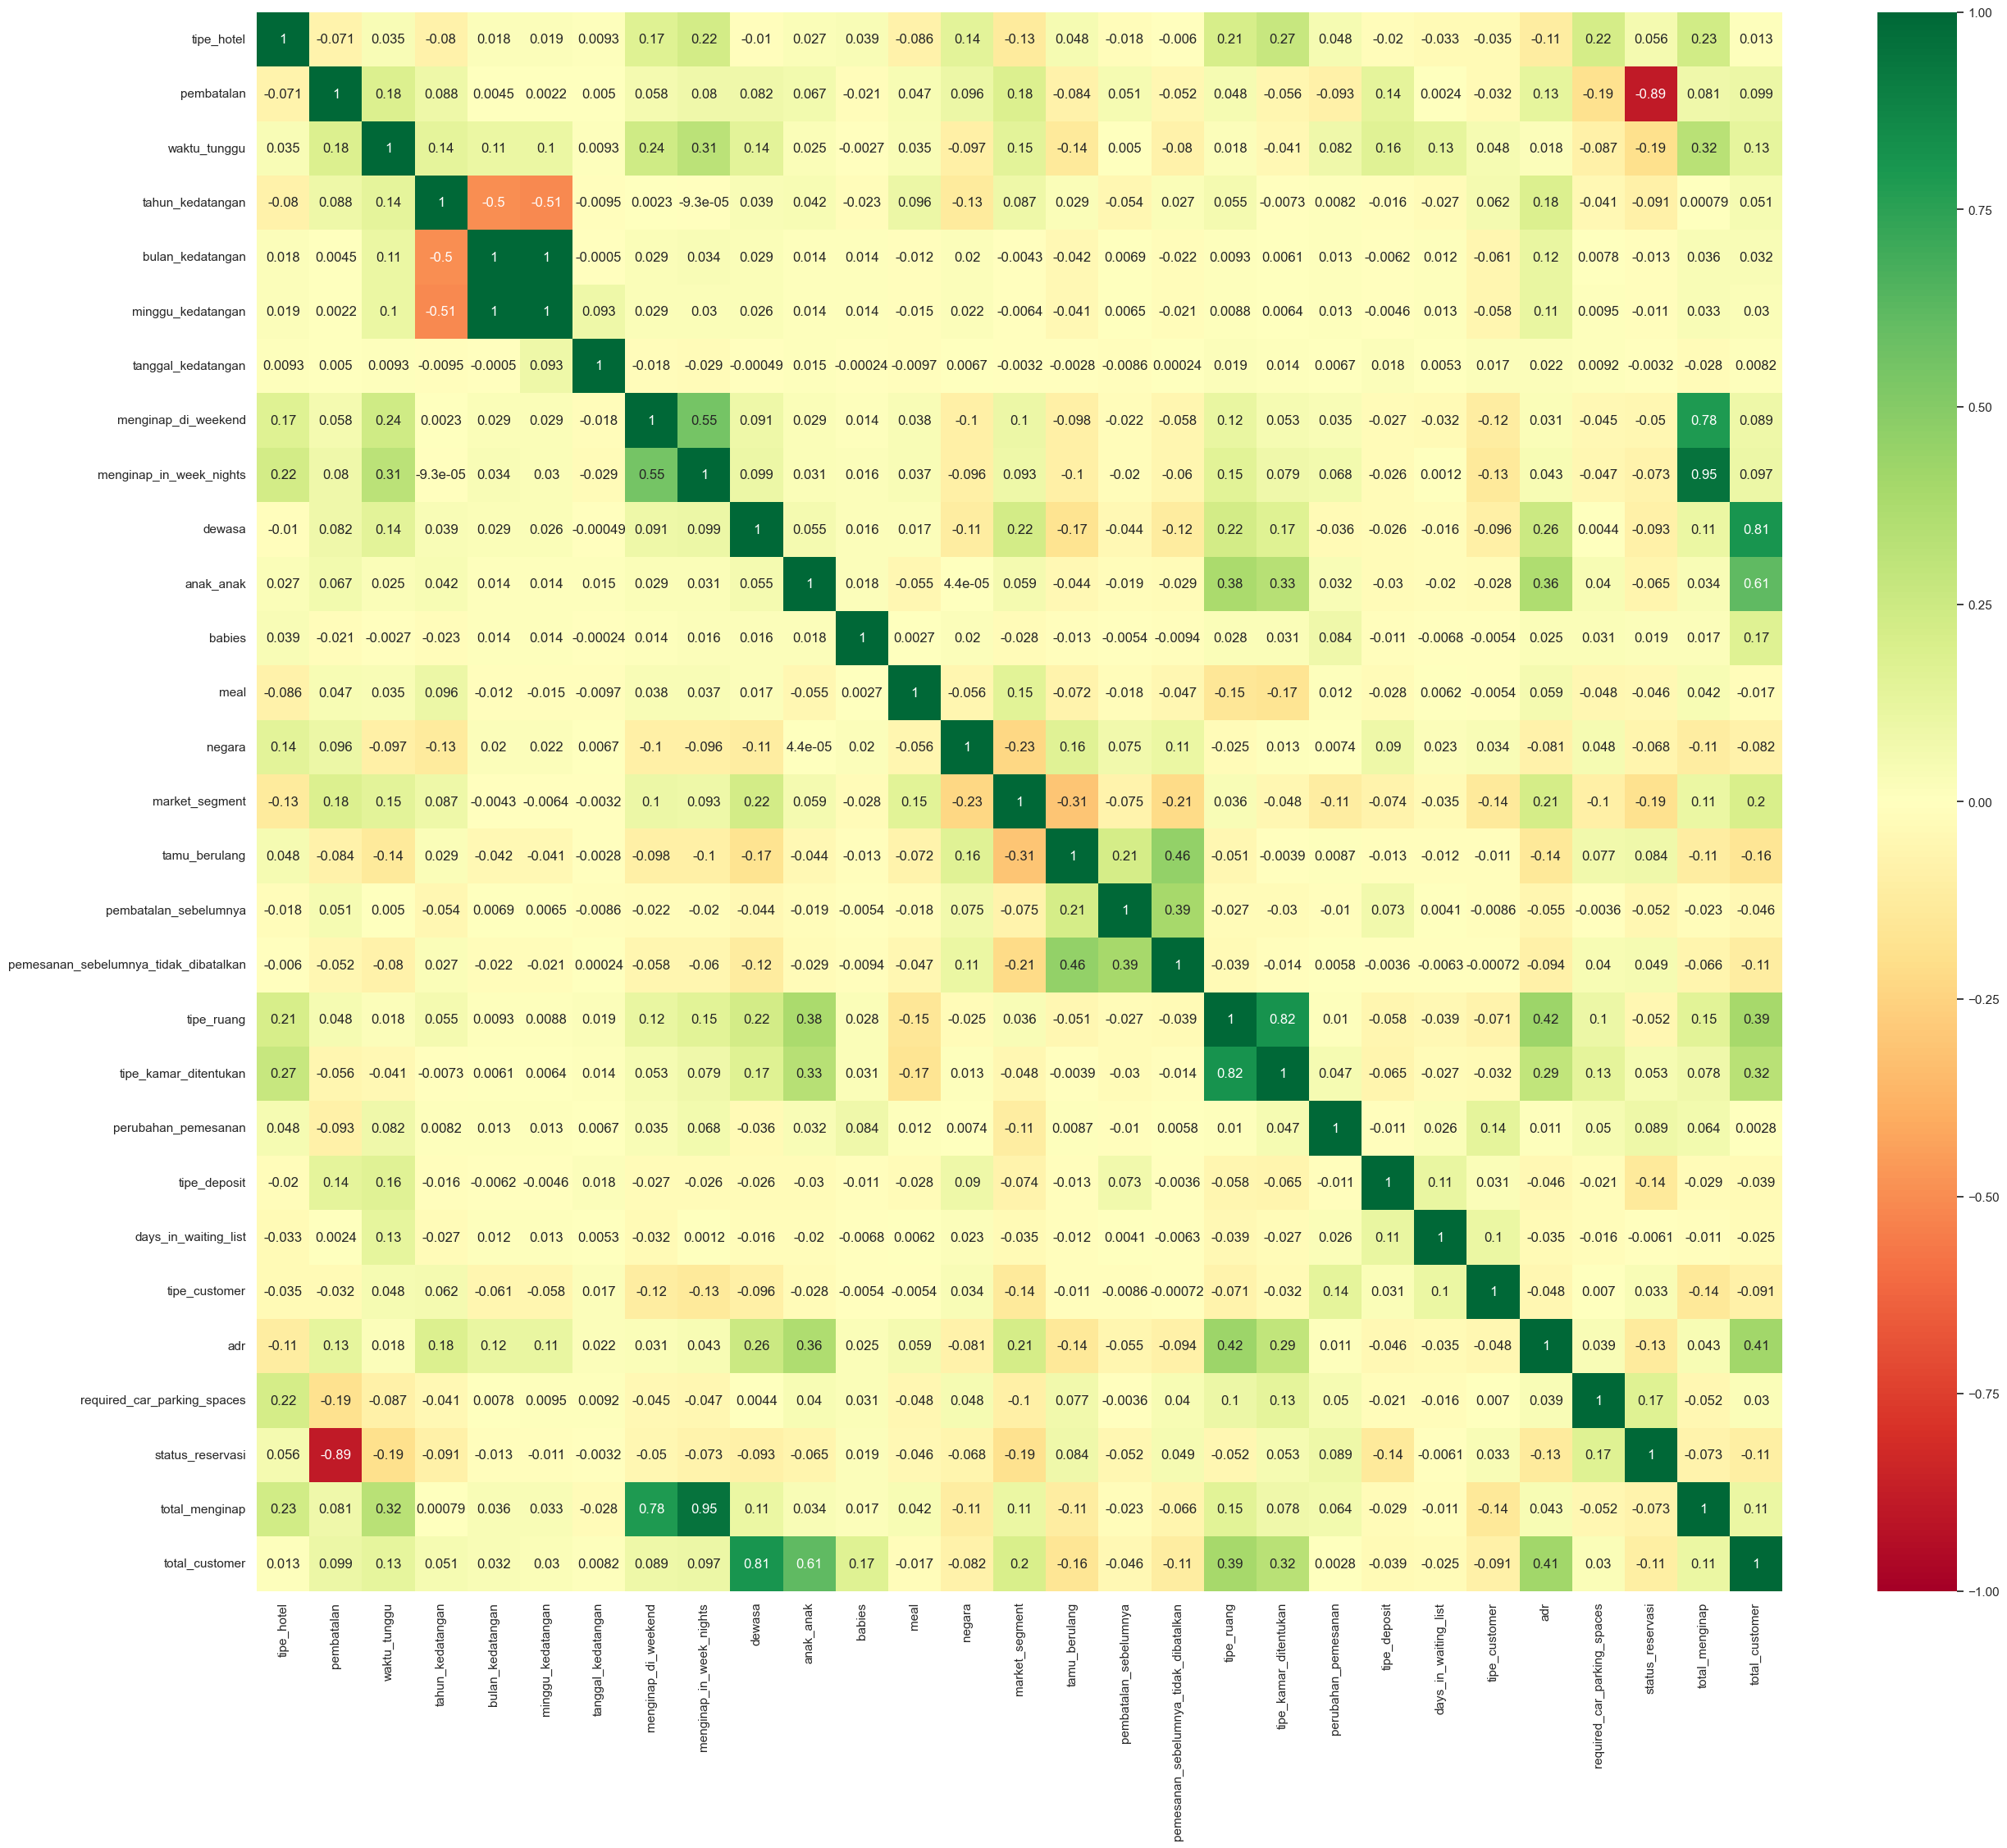

In [50]:
# Melakukan perhitungan nilai korelasi dengan mengasumsikan data adalah data interval.
plt.figure(figsize=(30,25))
sns.heatmap(df_clean.corr(), vmax=1, vmin=-1, center=0, cmap="RdYlGn", annot=True)

In [53]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df_clean.corr()["pembatalan"].sort_values()
korelasi

status_reservasi                        -0.888815
perubahan_pemesanan                     -0.092999
tamu_berulang                           -0.084239
tipe_hotel                              -0.071138
tipe_kamar_ditentukan                   -0.056267
pemesanan_sebelumnya_tidak_dibatalkan   -0.052439
tipe_customer                           -0.032499
days_in_waiting_list                     0.002444
bulan_kedatangan                         0.004481
tanggal_kedatangan                       0.005041
pembatalan_sebelumnya                    0.050586
total_menginap                           0.081365
tahun_kedatangan                         0.088317
negara                                   0.096235
total_customer                           0.098714
adr                                      0.128629
tipe_deposit                             0.136748
market_segment                           0.182955
waktu_tunggu                             0.183891
pembatalan                               1.000000


5. FEATURE DROPPED

In [52]:
df_clean.drop(['babies',
         'anak_anak',
         'dewasa',
         'menginap_in_week_nights',
         'menginap_di_weekend',
         'tipe_ruang',
         'minggu_kedatangan', 
         'meal', 
         'required_car_parking_spaces'],axis=1,inplace=True)

#### MODELING

1. TRAIN TEST PRED SPLIT

In [54]:
#membagi data train test dengan predict data
train_test_data = 0.9
pred_data = 0.1

train_test_data = int(len(df_clean)*train_test_data)
pred_data = int(len(df_clean)*pred_data)
df_train_test = df_clean[:train_test_data]
df_pred = df_clean[train_test_data:]
print('Jumlah Data train test : ',df_train_test.shape[0])
print('Jumlah Data prediksi : ',df_pred.shape[0])

Jumlah Data train test :  76921
Jumlah Data prediksi :  8547


In [55]:
df_train_test = df_clean
X = df_clean.drop('pembatalan', axis=1)
y = df_clean['pembatalan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  59827
y Train :  59827
X Test :  25641
t Test :  25641


2. STATS MODEL

In [56]:
Input = sm.add_constant(X_train)

In [57]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.144941
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             pembatalan   No. Observations:                59827
Model:                          Logit   Df Residuals:                    59808
Method:                           MLE   Df Model:                           18
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.7543
Time:                        22:33:36   Log-Likelihood:                -8671.4
converged:                       True   LL-Null:                       -35293.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
tipe_hotel                               -0.4316      

In [58]:
# odds ratio
round(np.exp(result.params), 3)

tipe_hotel                               0.649
waktu_tunggu                             1.373
tahun_kedatangan                         1.173
bulan_kedatangan                         1.008
tanggal_kedatangan                       1.006
negara                                   1.010
market_segment                           1.213
tamu_berulang                            0.964
pembatalan_sebelumnya                    1.188
pemesanan_sebelumnya_tidak_dibatalkan    0.950
tipe_kamar_ditentukan                    0.974
perubahan_pemesanan                      0.860
tipe_deposit                             2.851
days_in_waiting_list                     0.106
tipe_customer                            1.191
adr                                      3.142
status_reservasi                         0.002
total_menginap                           1.086
total_customer                           1.021
dtype: float64

In [59]:
prediction = result.predict(X_test)

In [60]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

logreg_pred  prediksi  actual
27262      0.049253         0       0
54211      0.960915         1       1
112338     0.083729         0       0
4479       0.965483         1       1
39141      0.017159         0       0

In [61]:
# evaluate predictions test data
print('accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

accuracy =  0.988
precision =  1.000
recall =  0.956


2. MODELLING LOGISTIC REGRESSION

In [62]:
#build model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make predictions for test data
y_pred_logreg = logreg.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred_logreg

# evaluate predictions test data
accuracy_logreg = accuracy_score(y_pred_logreg, y_test)
print("Accuracy: %.2f%%" % (accuracy_logreg * 100.0))
precision_logreg = precision_score(y_pred_logreg, y_test)
print("Precision: %.2f%%" % (precision_logreg * 100.0))
recall_logreg = recall_score(y_pred_logreg, y_test)
print("Recall: %.2f%%" % (recall_logreg * 100.0))

Accuracy: 98.74%
Precision: 95.41%
Recall: 99.94%


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.988
Accuracy of logistic regression classifier test data: 0.987


3. MODELLING SVM

In [64]:
svm = SVC()
svm.fit(X_train, y_train)

# make predictions for test data
y_pred_svm = svm.predict(X_test)
svc_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
svc_test['prediction'] = y_pred_svm

# evaluate predictions for test data
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))
precision_svm =precision_score(y_pred_svm, y_test)
print("Precision: %.2f%%" % (precision_svm * 100.0))
recall_svm = recall_score(y_pred_svm, y_test)
print("Recall: %.2f%%" % (recall_svm * 100.0))

Accuracy: 98.79%
Precision: 95.55%
Recall: 100.00%


In [65]:
print('Accuracy of SVM train data: {:.3f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM test data: {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM train data: 0.989
Accuracy of SVM test data: 0.988


4. MODELLING RANDOM FOREST

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# make predictions for test data
y_pred_rf = rf.predict(X_test)
rf_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
rf_test['prediction'] = y_pred_rf

# evaluate predictions
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))
precision_rf =precision_score(y_pred_rf, y_test)
print("Precision: %.2f%%" % (precision_rf * 100.0))
recall_rf = recall_score(y_pred_rf, y_test)
print("Recall: %.2f%%" % (recall_rf * 100.0))

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In [67]:
print('Accuracy of random forest train data: {:.3f}'.format(rf.score(X_train, y_train)))
print('Accuracy of random forest test data: {:.3f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest train data: 1.000
Accuracy of random forest test data: 1.000


5. MODELLING KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# make predictions for test data
y_pred_knn = knn.predict(X_test)
knn_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
knn_test['prediction'] = y_pred_knn

# evaluate predictions
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("Accuracy: %.2f%%" % (accuracy_knn * 100.0))
precision_knn =precision_score(y_pred_knn, y_test)
print("Precision: %.2f%%" % (precision_knn * 100.0))
recall_knn = recall_score(y_pred_knn, y_test)
print("Recall: %.2f%%" % (recall_knn * 100.0))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 84.92%
Precision: 62.47%
Recall: 77.68%


In [69]:
print('Accuracy of KNN train data: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN test data: {:.3f}'.format(knn.score(X_test, y_test)))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN train data: 0.928


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN test data: 0.849


6. MODELLING XGBOOST

In [70]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred_xgb = xgb.predict(X_test)
xgb_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
xgb_test['prediction'] = y_pred_xgb

# evaluate predictions
accuracy_xgb = accuracy_score(y_pred_xgb, y_test)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))
precision_xgb =precision_score(y_pred_xgb, y_test)
print("Precision: %.2f%%" % (precision_xgb * 100.0))
recall_xgb = recall_score(y_pred_xgb, y_test)
print("Recall: %.2f%%" % (recall_xgb * 100.0))

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


In [71]:
print('Accuracy of XGB train data: {:.3f}'.format(xgb.score(X_train, y_train)))
print('Accuracy of XGB test data: {:.3f}'.format(xgb.score(X_test, y_test)))

Accuracy of XGB train data: 1.000
Accuracy of XGB test data: 1.000


#### EVALUATION

1. LOGISTIC REGRESSION (CV,TUNING,EVALUATION)

In [74]:
#STRATIFIED KFOLD
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logreg, X_train, y_train, cv=skfold)
print('Cross validation score : {:.3f}'.format(scores.mean()))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross validation score : 0.988


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
#HYPERPARAMETER TUNING
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight': ['balanced',None],
                'solver':['lbfgs','liblinear','newton-cg']}

grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=skfold)
grid_search_lr.fit(X_train, y_train)
print('Best params : {}'.format(grid_search_lr.best_params_))
print('Best cross-validation score : {:.3}'.format(grid_search_lr.best_score_))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best params : {'C': 0.1, 'class_weight': None, 'solver': 'liblinear'}
Best cross-validation score : 0.989


In [76]:
#EVALUASI MENGGUNAKAN MODEL YANG SUDAH DI PARAMETER TUNING

scoring = {'acc' : 'accuracy',
          'F1' : 'f1',
          'prec' : 'precision',
          'recall' : 'recall'}

acc_logreg = []
f1_logreg = []
prec_logreg = []
recall_logreg = []

logreg_tuning_skfold = LogisticRegression(C=0.1, solver='liblinear')
scores = cross_validate(logreg_tuning_skfold, X, y, cv=skfold, scoring=scoring)

acc_logreg.append(scores['test_acc'].mean())
f1_logreg.append(scores['test_F1'].mean())
prec_logreg.append(scores['test_prec'].mean())
recall_logreg.append(scores['test_recall'].mean())

print('Accuracy : ',acc_logreg)
print('Precision : ',prec_logreg)
print('Recall : ',recall_logreg)

Accuracy :  [0.9883348268593691]
Precision :  [0.9998669324044777]
Recall :  [0.95775423148959]


2. RANDOM FOREST (CV,TUNING,EVALUATION)

In [70]:
#STRATIFIED KFOLD
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=skfold)
print('Cross validation score : {:.3f}'.format(scores.mean()))

Cross validation score : 1.000


In [71]:
#HYPERPARAMETER TUNING
param_grid_rf = {'bootstrap': [True],
                 'max_features': [2, 3],
                 'min_samples_leaf': [3, 4, 5],
                 'n_estimators': [100, 200, 300, 1000]}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=skfold)
grid_search_rf.fit(X_train, y_train)
print('Best params : {}'.format(grid_search_rf.best_params_))
print('Best cross-validation score : {:.3}'.format(grid_search_rf.best_score_))

Best params : {'bootstrap': True, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 1000}
Best cross-validation score : 0.999


In [72]:
#EVALUASI MENGGUNAKAN MODEL YANG SUDAH DI PARAMETER TUNING

scoring = {'acc' : 'accuracy',
          'F1' : 'f1',
          'prec' : 'precision',
          'recall' : 'recall'}

acc_rf = []
f1_rf = []
prec_rf = []
recall_rf = []

rf_tuning_skfold = RandomForestClassifier(bootstrap=True, max_features=3, min_samples_leaf=3, n_estimators=200)
scores = cross_validate(rf_tuning_skfold, X, y, cv=skfold, scoring=scoring)

acc_rf.append(scores['test_acc'].mean())
f1_rf.append(scores['test_F1'].mean())
prec_rf.append(scores['test_prec'].mean())
recall_rf.append(scores['test_recall'].mean())

print('Accuracy : ',acc_rf)
print('Precision : ',prec_rf)
print('Recall : ',recall_rf)

Accuracy :  [0.9997542956473513]
Precision :  [1.0]
Recall :  [0.9991074861810707]


3. SVM (CV,TUNING,EVALUATION)

In [74]:
#STRATIFIED KFOLD
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X_train, y_train, cv=skfold)
print('Cross validation score : {:.3f}'.format(scores.mean()))

Cross validation score : 0.989


In [ ]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
param_grid_svm = {'kernel': ['rbf', 'linear'],
'C': [0.01, 0.1],
'gamma': [0.01, 0.1]}
grid_search_svm = GridSearchCV(svm, param_grid_svm,cv=skfold)
grid_search_svm.fit(X, y)
print('Best parameters:{}'.format(grid_search_svm.best_params_))
print('Best GridSearchCV validation score:{:.3}'.format(grid_search_svm.best_score_))

In [73]:
#EVALUASI MENGGUNAKAN MODEL YANG SUDAH DI PARAMETER TUNING

scoring = {'acc': 'accuracy',
           'F1': 'f1',
           'prec': 'precision',
           'recall':'recall'}
 
acc_svm = []
f1_svm = []
prec_svm = []
recall_svm = []
 
svm_tuning = SVC(C=0.1, kernel='rbf', gamma=0.01)
svm_tuning.fit(X_train, y_train)
scores = cross_validate(svm_tuning, X_train, y_train, cv=skfold, scoring=scoring)
 
acc_svm.append(scores['test_acc'].mean())
f1_svm.append(scores['test_F1'].mean())
prec_svm.append(scores['test_prec'].mean())
recall_svm.append(scores['test_recall'].mean())
 
print("Accuracy scores: ", acc_svm)
print("f1 scores: ", f1_svm)
print("Precision scores: ", prec_svm)
print("Recall scores: ", recall_svm)

Accuracy scores:  [0.9057448646635589]
f1 scores:  [0.7953075663173859]
Precision scores:  [0.9965783706711262]
Recall scores:  [0.6617955762032455]


4. KNN (CV,TUNING,EVALUATION)

In [ ]:
#STRATIFIED KFOLD
# skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(knn, X_train, y_train, cv=skfold)
# print('Cross validation score : {:.3f}'.format(scores.mean()))

In [ ]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
# param_grid_knn = { 'n_neighbors' : [5,7,9,11,13,15],
#                'weights' : ['uniform','distance'],
#                'metric' : ['minkowski','euclidean','manhattan']}

# grid_search_knn = GridSearchCV(knn, param_grid_knn,cv=skfold)
# grid_search_knn.fit(X, y)
# print('Best parameters:{}'.format(grid_search_knn.best_params_))
# print('Best GridSearchCV validation score:{:.3}'.format(grid_search_knn.best_score_))

In [ ]:
#EVALUASI MENGGUNAKAN MODEL YANG SUDAH DI PARAMETER TUNING

# scoring = {'acc' : 'accuracy',
#           'F1' : 'f1',
#           'prec' : 'precision',
#           'recall' : 'recall'}

# acc_knn = []
# f1_knn = []
# prec_knn = []
# recall_knn = []

# knn_tuning_skfold = KNN(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
# scores = cross_validate(knn_tuning_skfold, X, y, cv=skfold, scoring=scoring)

# acc_knn.append(scores['test_acc'].mean())
# f1_knn.append(scores['test_F1'].mean())
# prec_knn.append(scores['test_prec'].mean())
# recall_knn.append(scores['test_recall'].mean())

# print('Accuracy : ',acc_knn)
# print('Precision : ',prec_knn)
# print('Recall : ',recall_knn)

5. XGBOOST (CV,TUNING,EVALUATION)

In [ ]:
#STRATIFIED KFOLD
# skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(xgb, X_train, y_train, cv=skfold)
# print('Cross validation score : {:.3f}'.format(scores.mean()))

In [ ]:
# Menggunakan GridSearchCV dan cross-validation dalam model SVM
# param_grid_xgb = { 'max_depth':range(3,10,2),
#                   'min_child_weight':range(1,6,2)}

# grid_search_xgb = GridSearchCV(xgb, param_grid_xgb,cv=skfold)
# grid_search_xgb.fit(X, y)
# print('Best parameters:{}'.format(grid_search_xgb.best_params_))
# print('Best GridSearchCV validation score:{:.3}'.format(grid_search_xgb.best_score_))

In [ ]:
#EVALUASI MENGGUNAKAN MODEL YANG SUDAH DI PARAMETER TUNING

# scoring = {'acc' : 'accuracy',
#           'F1' : 'f1',
#           'prec' : 'precision',
#           'recall' : 'recall'}

# acc_xgb = []
# f1_xgb = []
# prec_xgb = []
# recall_xgb = []

# xgb_tuning_skfold = XGBClassifier(x_depth=5,min_child_weight=2)
# scores = cross_validate(xgb_tuning_skfold, X, y, cv=skfold, scoring=scoring)

# acc_xgb.append(scores['test_acc'].mean())
# f1_xgb.append(scores['test_F1'].mean())
# prec_xgb.append(scores['test_prec'].mean())
# recall_xgb.append(scores['test_recall'].mean())

# print('Accuracy : ',acc_xgb)
# print('Precision : ',prec_xgb)
# print('Recall : ',recall_xgb)

### LOAD AND PREDICT NEW DATA

1. PREDICT LOGISTIC REGRESSION

In [72]:
df_pred
X_predict = df_clean.drop('pembatalan', axis=1)
y_predict = df_clean['pembatalan']

In [77]:
logreg_tuning_skfold.fit(X_train, y_train)
y_pred_logreg = logreg_tuning_skfold.predict(X_predict)
logreg_test = pd.merge(X_predict, y_predict, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred_logreg

# evaluate predictions
accuracy_logreg = accuracy_score(y_pred_logreg, y_predict)
print("Accuracy Pred: %.2f%%" % (accuracy_logreg * 100.0))
precision_logreg = precision_score(y_pred_logreg, y_predict)
print("Precision Pred: %.2f%%" % (precision_logreg * 100.0))
recall_logreg = recall_score(y_pred_logreg, y_predict)
print("Recall Pred: %.2f%%" % (recall_logreg * 100.0))

Accuracy Pred: 98.84%
Precision Pred: 95.78%
Recall Pred: 99.99%


2. PREDICT RANDOM FOREST

In [78]:
rf = RandomForestClassifier(max_features=3, min_samples_leaf=3, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_predict)
logreg_test = pd.merge(X_predict, y_predict, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred_rf

# evaluate predictions
accuracy_rf = accuracy_score(y_pred_rf, y_predict)
print("Accuracy Pred: %.2f%%" % (accuracy_rf * 100.0))
precision_rf = precision_score(y_pred_rf, y_predict)
print("Precision Pred: %.2f%%" % (precision_rf * 100.0))
recall_rf = recall_score(y_pred_rf, y_predict)
print("Recall Pred: %.2f%%" % (recall_rf * 100.0))

Accuracy Pred: 99.99%
Precision Pred: 99.97%
Recall Pred: 100.00%


3. PREDICT SVM

In [79]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_predict)
svm_test = pd.merge(X_predict, y_predict, left_index=True, right_index=True, how='outer')
svm_test['prediction'] = y_pred_svm

# evaluate predictions
accuracy_svm = accuracy_score(y_pred_svm, y_predict)
print("Accuracy Pred: %.2f%%" % (accuracy_svm * 100.0))
precision_svm = precision_score(y_pred_svm, y_predict)
print("Precision Pred: %.2f%%" % (precision_svm * 100.0))
recall_svm = recall_score(y_pred_svm, y_predict)
print("Recall Pred: %.2f%%" % (recall_svm * 100.0))

Accuracy Pred: 98.84%
Precision Pred: 95.78%
Recall Pred: 100.00%


4. PREDICT XGBOOST

In [80]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_predict)
xgb_test = pd.merge(X_predict, y_predict, left_index=True, right_index=True, how='outer')
xgb_test['prediction'] = y_pred_xgb

# evaluate predictions
accuracy_xgb = accuracy_score(y_pred_xgb, y_predict)
print("Accuracy Pred: %.2f%%" % (accuracy_xgb * 100.0))
precision_xgb = precision_score(y_pred_xgb, y_predict)
print("Precision Pred: %.2f%%" % (precision_xgb * 100.0))
recall_xgb = recall_score(y_pred_xgb, y_predict)
print("Recall Pred: %.2f%%" % (recall_xgb * 100.0))

Accuracy Pred: 100.00%
Precision Pred: 100.00%
Recall Pred: 100.00%


5. PREDICT KNN

In [81]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_predict)
knn_test = pd.merge(X_predict, y_predict, left_index=True, right_index=True, how='outer')
knn_test['prediction'] = y_pred_knn

# evaluate predictions
accuracy_knn = accuracy_score(y_pred_knn, y_predict)
print("Accuracy Pred: %.2f%%" % (accuracy_knn * 100.0))
precision_knn = precision_score(y_pred_knn, y_predict)
print("Precision Pred: %.2f%%" % (precision_knn * 100.0))
recall_knn = recall_score(y_pred_knn, y_predict)
print("Recall Pred: %.2f%%" % (recall_knn * 100.0))

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Pred: 90.45%
Precision Pred: 75.65%
Recall Pred: 87.97%


In [82]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest Classifier', 'SVM', 'XGBoost', 'KNN'],
    'Score' : [precision_logreg, precision_rf, precision_svm, precision_xgb, precision_knn]})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3                   XGBoost  1.000000
1  Random Forest Classifier  0.999702
0       Logistic Regression  0.957839
2                       SVM  0.957839
4                       KNN  0.756471

In [83]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

### KESIMPULAN/SARAN

Berdasarkan hasil modelling dengan percobaan 5 model machine learning, didapatkan bahwa model XGBoost dan random forest adalah model yang paling baik apabila dibandingkan dengan  SVM, KNN dan regresi logistik. XGBoost dan random forest tidak memerlukan tuning parameter untuk menghasilkan nilai precision yang maksimal. Untuk model SVM dan logistik regression hanya memerlukan sedikit tuning parameter untuk mendapatkan nilai precision yang bagus. Sementara model KNN sangat memerlukan tuning parameter dikarenakan akurasi model pada dataset mengalami underfitting yang dimana akurasi data train lebih besar dari data test. 